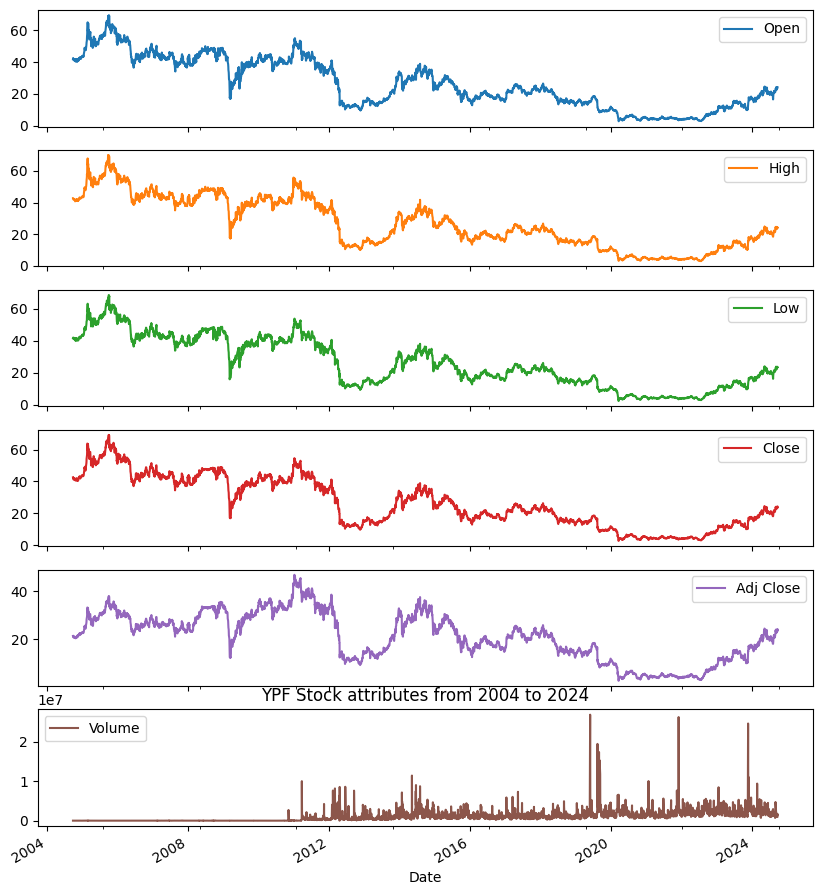

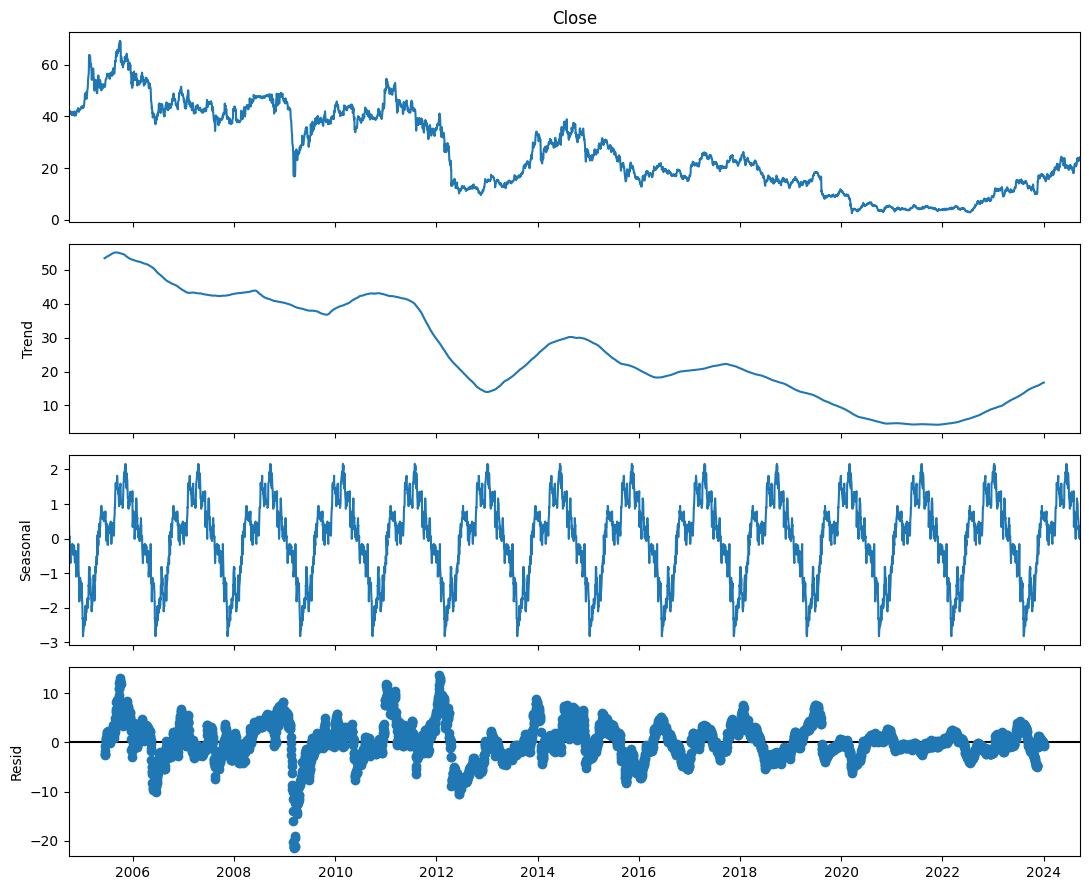

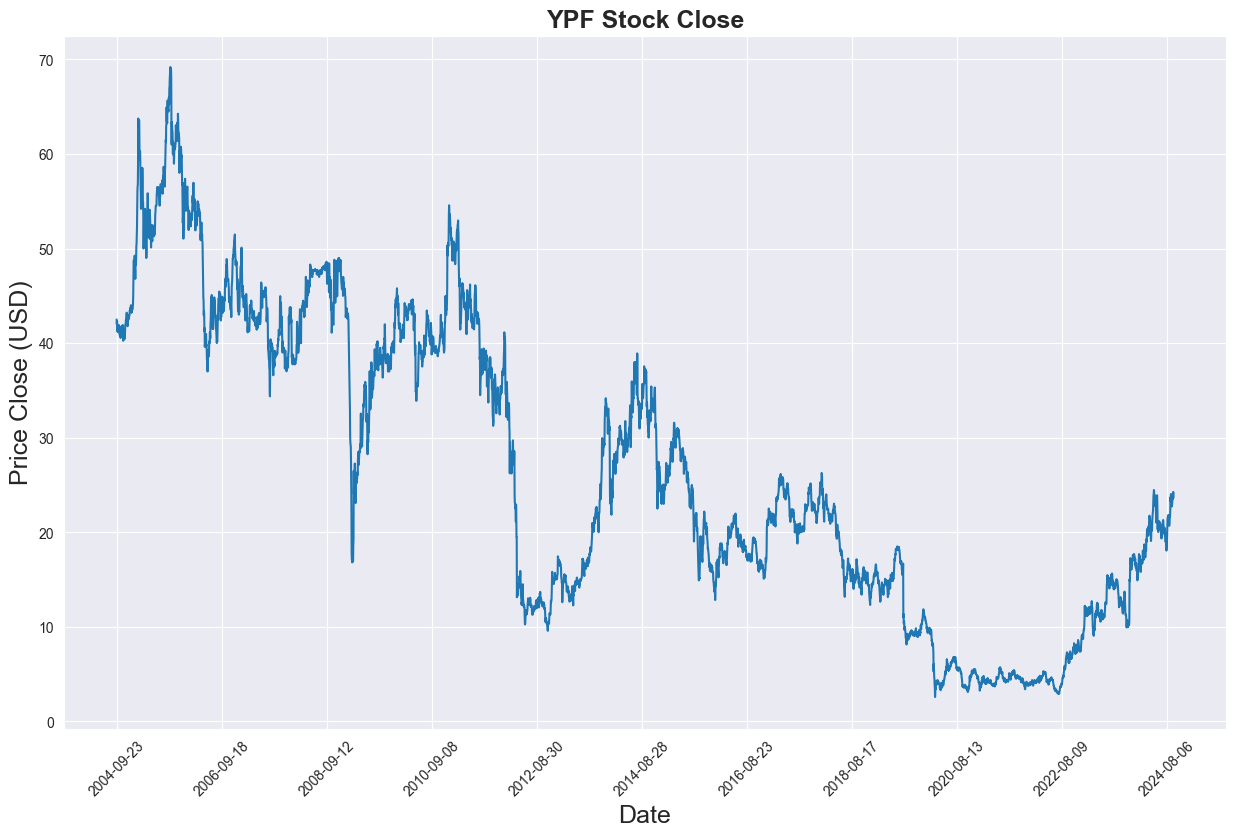

In [ ]:
#importacion de librerias
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

#no se que es esto
pd.options.mode.chained_assignment = None

#ANALISIS ESTADISTICO
#lectura de csv descargado
#parseo por date
ypf = pd.read_csv('YPF.csv', index_col='Date', parse_dates=['Date'])
ypf.head(5)


#import plotly.express as px
#histogramas de las cabeceras Close Open  y grafica de rel. Open vs Close
fig = px.histogram(ypf, 
                   x='Close', 
                   marginal='box', 
                   nbins=47, 
                   title='Distribution of Close')
fig.update_layout(bargap=0.1)
fig.show()

fig = px.histogram(ypf, 
                   x='Open', 
                   marginal='box', 
                   color_discrete_sequence=['red'], 
                   title='Distribution of open')
fig.update_layout(bargap=0.1)
fig.show()

fig = px.scatter(ypf, 
                 x='Open', 
                 y='Close', 
                 
                 opacity=0.8, 
                  
                 title='Open vs. Close')
fig.update_traces(marker_size=5)
fig.show()

ypf.corr()
6
ypf['2004':'2024'].plot(subplots=True, figsize=(10,12))
plt.title('YPF Stock attributes from 2004 to 2024')
plt.show()


#Analisis y ploteo de estacionalidad
from pylab import rcParams
import statsmodels.api as sm

rcParams['figure.figsize'] = 11, 9
decomposed_ypf_volume = sm.tsa.seasonal_decompose(ypf["Close"],period=360) # The frequncy is annual
figure = decomposed_ypf_volume.plot()
plt.show()

#MODELADO DE DATOS
#lectura de datos
filepath = 'YPF.csv'
data_ypf = pd.read_csv(filepath)
data_ypf = data_ypf.sort_values('Date')
data_ypf.head()


sns.set_style("darkgrid")
plt.figure(figsize = (15,9))
plt.plot(data_ypf[['Close']])
plt.xticks(range(0,data_ypf.shape[0],500),data_ypf['Date'].loc[::500],rotation=45)
plt.title("YPF Stock Close",fontsize=18, fontweight='bold')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Price Close (USD)',fontsize=18)
plt.show()